# Milestone 1 - Notebook 201 
## Peter's Discussion of Multigenre Challenges
### Notes:
- JR's TMDB API Key: 8c7d0bb785cb396ff84c3392e3baa7f9
- Working with tmdbsimple wrapper to obtain data (Check https://github.com/celiao/tmdbsimple/)
- Author of tmdbsimple has a library with a Rotten Tomatoes Wrapper (Check https://pypi.python.org/pypi/rtsimple)
- See first code block below for installation of necessary packages and helpful Ubuntu commands

### What this notebook does:
- Import the tmdbsimple package
- Display example of a movie search that returns multiple results
- Display all data and poster for favorite movie

- Obtain list of 20 most popular movies of 2016
- Create dataframe with relevant characteristics of these movies
- Create dataframe of genre per movie
- Create and visualize dataframe of genre relative co-occurrance


In [6]:
# Note: be sure to launch Python as root with command: sudo ipython notebook
# Also, need to previously run command: sudo apt-get install python-imaging-tk
# And this might be helpful: sudo apt-get install build-essential libssl-dev libffi-dev python-dev
# !pip install --upgrade pip
# !pip install cryptography
# !pip install tmdbsimple
# !pip install Image

In [7]:
# Import tmdbsimple wrapper
from collections import OrderedDict
from imdb import IMDb
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
import pandas as pd
from PIL import Image
import tmdbsimple as tm
import urllib

%matplotlib inline
tm.API_KEY = '8c7d0bb785cb396ff84c3392e3baa7f9'
im = IMDb()

### 1a. First, show all search results for "The Matrix"

In [8]:
# Find Movie Code
search = tm.Search()
response = search.movie(query='The Matrix')
for s in search.results:
    print(s['title'], s['id'])
    p = s['id']

(u'The Matrix', 603)
(u'The Matrix Reloaded', 604)
(u'The Matrix Revolutions', 605)
(u'The Matrix Revisited', 14543)
(u'Sex and the Matrix', 344225)
(u'The Matrix Recalibrated', 221495)
(u'The Living Matrix', 119742)
(u'The Roots of the Matrix', 274866)
(u'The Zionist Matrix of Power', 408912)
(u'The American Matrix - Age Of Deception', 26214)
(u'The Happiness Matrix: Creativity and Personal Mastery', 323256)
(u'David Icke - Secrets of the Matrix', 371610)
(u'Return to Source: The Philosophy of The Matrix', 174615)
(u'Adventures in Odyssey: Escape from the Forbidden Matrix', 268477)
(u'The Animatrix', 55931)
(u'The Transformers: The Movie', 1857)


### 1b. Next, display all available data for The Matrix, including poster and genres

In [9]:
# Display all data for The Matrix
thematrix = tm.Movies(search.results[0]['id']).info()
thematrix

{u'adult': False,
 u'backdrop_path': u'/7u3pxc0K1wx32IleAkLv78MKgrw.jpg',
 u'belongs_to_collection': {u'backdrop_path': u'/RhUxjzNojIJsdZSYTn0CQvdKsn.jpg',
  u'id': 2344,
  u'name': u'The Matrix Collection',
  u'poster_path': u'/lh4aGpd3U9rm9B8Oqr6CUgQLtZL.jpg'},
 u'budget': 63000000,
 u'genres': [{u'id': 28, u'name': u'Action'},
  {u'id': 878, u'name': u'Science Fiction'}],
 u'homepage': u'http://www.warnerbros.com/matrix',
 u'id': 603,
 u'imdb_id': u'tt0133093',
 u'original_language': u'en',
 u'original_title': u'The Matrix',
 u'overview': u'Set in the 22nd century, The Matrix tells the story of a computer hacker who joins a group of underground insurgents fighting the vast and powerful computers who now rule the earth.',
 u'popularity': 9.745149,
 u'poster_path': u'/lZpWprJqbIFpEV5uoHfoK0KCnTW.jpg',
 u'production_companies': [{u'id': 79, u'name': u'Village Roadshow Pictures'},
  {u'id': 372, u'name': u'Groucho II Film Partnership'},
  {u'id': 1885, u'name': u'Silver Pictures'},
  {u

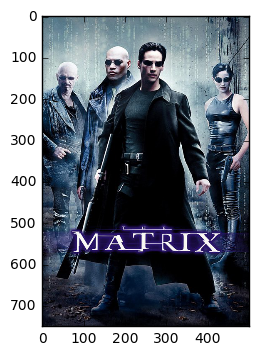

In [10]:
# Display poster for The Matrix
thematrix_poster = 'https://image.tmdb.org/t/p/w500/'+ thematrix['poster_path']
urllib.urlretrieve(thematrix_poster,'thematrix.jpg')
thematrix_image = Image.open('thematrix.jpg')
imshow(np.asarray(thematrix_image))
# thematrix_image.Show()

In [11]:
# Show comparison of genres in TMDB and IMDB
print "Genres for The Matrix, according to TMDB: "
for g in range(len(thematrix['genres'])):
    print str(g+1) + ". " + thematrix['genres'][g]['name']
    
# Use the IMDB id from TMDB to get IMDB data
thematrix_id = thematrix['imdb_id'][2:]
thematrix_imdb = im.get_movie(thematrix_id)
thematrix_genres_imdb = thematrix_imdb['genres']
print "\nGenres for The Matrix, according to IMDB: "
for g in range(len(thematrix_genres_imdb)):
    print str(g+1) + ". " + thematrix_genres_imdb[g]

Genres for The Matrix, according to TMDB: 
1. Action
2. Science Fiction

Genres for The Matrix, according to IMDB: 
1. Action
2. Sci-Fi


In this case, genres happen to match! But let's check and see if this applies to all the other movies returned by searching for "The Matrix"

### 1c. Now, display comparison of TMDB and IMDB genres for all search results

In [12]:
# Retrieve all data to display
t = []; i = []; p = []; gt_num = []; gt = []; gi_num = []; gi = []
for s in range(len(search.results)):
    # Store basic movie data
    movie = tm.Movies(search.results[s]['id']).info()
    t.append(movie['title'])
    i.append(movie['id'])
    p.append(movie['popularity'])
    
    # Store TMDB genre data
    gt_num.append(len(movie['genres']))
    g_temp = ""
    for g in range(len(movie['genres'])):
        g_temp += str(movie['genres'][g]['name']) + ", "
    g_temp = g_temp[:-2]
    gt.append(g_temp)

    # Store IMDB genre data
    if (movie['imdb_id'] is not None) & (str(movie['imdb_id']) != ''):
        movie_genres_imdb = im.get_movie(movie['imdb_id'][2:])['genres']
        gi_num.append(len(movie_genres_imdb))
        g_temp = ""
        for g in range(len(movie_genres_imdb)):
            g_temp += movie_genres_imdb[g] + ", "
        g_temp = g_temp[:-2]
        gi.append(g_temp)
    else:
        gi_num.append("NA")
        gi.append("")

# Produce Dataframe
genre_compare = pd.DataFrame(OrderedDict((('Title', t), ('ID', i), ('Popularity', p), ('Genres_TMDB_n', gt_num), ('Genres_TMDB', gt), ('Genres_IMDB_n', gi_num), ('Genres_IMDB', gi))))
genre_compare

,Title,ID,Popularity,Genres_TMDB_n,Genres_TMDB,Genres_IMDB_n,Genres_IMDB
0,The Matrix,603,9.745149,2,"Action, Science Fiction",2,"Action, Sci-Fi"
1,The Matrix Reloaded,604,3.730741,4,"Adventure, Action, Thriller, Science Fiction",2,"Action, Sci-Fi"
2,The Matrix Revolutions,605,3.648374,4,"Adventure, Action, Thriller, Science Fiction",2,"Action, Sci-Fi"
3,The Matrix Revisited,14543,0.686345,1,Documentary,1,Documentary
4,Sex and the Matrix,344225,0.000210,0,,2,"Comedy, Short"
5,The Matrix Recalibrated,221495,0.061314,2,"Documentary, Science Fiction",2,"Documentary, Short"
6,The Living Matrix,119742,0.003760,1,Documentary,1,Documentary
7,The Roots of the Matrix,274866,0.009884,1,Documentary,NA,
8,The Zionist Matrix of Power,408912,0.000869,1,Documentary,NA,
9,The American Matrix - Age Of Deception,26214,0.006915,1,Documentary,2,"Documentary, News"


### 1d. Visualize: Plot number of genres assigned vs. title length, for TMDB and IMDB

NameError: name 'title_lengths' is not defined

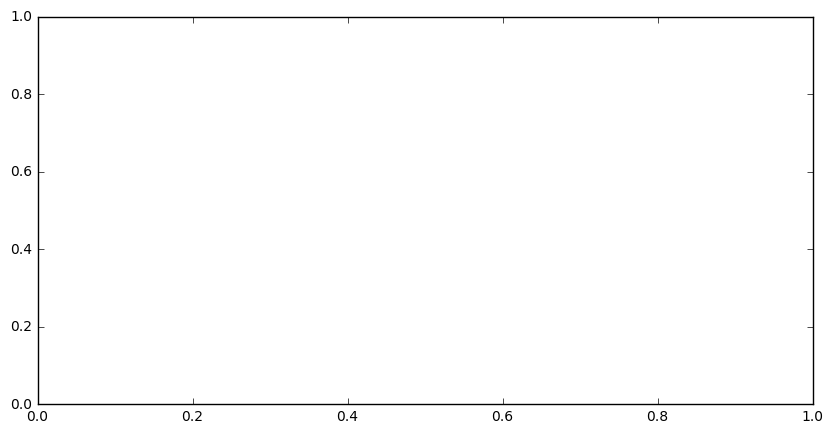

In [13]:
#Visualize our data
genre_compare['Title_length'] = map(lambda x: len(x), genre_compare['Title'])
exists_in_IMDB = np.where(genre_compare['Genres_IMDB_n'] != "NA")[0]
fig = plt.figure(figsize=(10, 5))
axes = fig.add_subplot(1, 1, 1)

# Plot TMDB and IMDB data, with jitter
axes.scatter(genre_compare['Title_length'], genre_compare['Genres_TMDB_n'] + np.random.randn(len(title_lengths))*0.05, c="red", alpha=0.5)
axes.scatter(genre_compare['Title_length'][exists_in_IMDB], genre_compare['Genres_IMDB_n'][exists_in_IMDB] + np.random.randn(len(exists_in_IMDB))*0.05, c="blue", alpha=0.5)

# Add labels and legend
axes.set_title("Number of genres vs. title length (with slight random offset)") 
axes.set_xlabel("Number of characters in movie title")
axes.set_ylabel("Number of genres assigned")
plt.legend()
plt.show()

We do not see a very clear relation between the number of characters in the movie title and the number of genres assign. If anything, there may be a tendency for movies with fewer characters to be assigned more genres, although this does not always hold true. We may hypothesize that large budget movies targeted at a wider audience tend to use shorter titles, while smaller budget movies with less advertising use longer titles as a way to either attract attention or explain the movie a bit more. Larger budget movies may be more likely to be assigned to more than one genre by the database coders since more coders are familiar with the movie and are likely to have an opinion on it.

We also notice that in some cases, both databases assign the same number of genres to a movie, but more frequently they do not.

## 2. Discussion of the problem of multiple genres

#### Problem
The number of genres listed per movie is inconsistent, both between movies within the same database (IMDB or TMDB) and between databases for the same movie.

#### Discussion
To address this challenge, we first note that the classification assigned by either of these databases is not necessarily correct. For example, TMDB assigns 0 genres to The Happiness Matrix, which does not make sense; it seems better to assign at least one genre (which IMDB does, "Documentary"). In addition, IMDB does not even contain some of the movies in TMDB (or at least, TMDB does not have their IMDB ID). Therefore, although we can assume most of the genres assigned to these movies in the databases are pretty good, there are bound to be some errors, some discrepancies, and especially many subjective classifications that can be debated even among experts. Therefore, it seems that our goal with this project should not be to find the one "right" answer but to come up with a classification that makes intuitive sense and generates fruitful discussion when compared with the database codings.

#### Possible approach
- We will be creating a model to predict genre, but it is not necessarily clear if we want the model to predict only one genre or potentially more than one. Regardless, we know that for each movie, we will want to have two types of outcomes: (1) which genre(s) best fit the movie, and (2) how many genres to assign.
- As inputs, we can include predictors from the TMBD data (such as overview, tagline, spoken languages, etc.), the movie poster image, and potentially other plot data from Wikipedia. Like the plot above in part (1d) of this notebook, we can plot the number of genres (and possibly likelihood of a specific genre) against our various possible predictors, exploring the data visually to detect possible patterns.
- Since we are working with a multiclass problem, step (1) seems relatively straightforward; it would make sense to train a separate binary classification model for each class (this is how one vs. the rest SVM performs its classification, anyway). For each potential genre, we will want to generate a separate likelihood that the movie belongs to that class, probably on a continuous scale.
- Step (2) is a bit trickier. We could set the same number of genres to predict, either one or more, and hold this number constant for all movies. This would allow us to simply choose the one or more classes with the highest likelihood and assign those genres. However, this is not consistent with current practice in TMDB and IMDB, and it would make for a less interesting problem than varying the number of genres by movie.
- Alternatively for step (2), we could train a model to assign a number of genres to each movie and then choose the classes with the highest likelihood to fill those genre slots. We may set a possible range for the number of genres, such as 1-5. We may then predict the number of genres for each movie based on title words, title length, budget, poster imagery, and other data. We can additionally include data on correlations between the top genres identifies to predict whether this number of genres makes sense, and we can test whether there is a mismatch between the genres that different inputs would predict (such as title and poster), which may indicate a greater likelihood of a multigenre movie.

#### Next steps
As we progress through the project, we will explore these options and others. We will collect the relevant data, clean it, format it into predictors, and implement various models for comparison. Throughout the process, we must keep our desired outcome and audience in mind.